In [3]:
from numpy import *
from matplotlib.pyplot import *

In [8]:
def delta(i,j):
    if i==j:
        return 1
    return 0

def H(x):
    mat = zeros( (x.size,)*4 )
    for i in range(x.size):
        for j in range(x.size):
            for k in range(x.size):
                for m in range(x.size):
                    value = (
                        0.1 * delta(i,k)*delta(j-1,m) +
                        
                        0.25 * delta(i-1,k)*delta(j,m) +
                        
                        0.3 * delta(i,k)*delta(j,m) +
                        
                        0.25 * delta(i+1,k)*delta(j,m) +
                        
                        0.1 * delta(i,k)*delta(j+1,m)
                        )
                    mat[i,j,k,m] = value
    return mat

def matsum(mat,x):
    add = 0
    for i in range(x.size):
        for j in range(x.size):
            add += mat[i,j]
    return add

def Tnew1(mat1,mat2,x):
    T = zeros( (x.size,x.size) )
    
    for i in range(x.size):
        for j in range(x.size):
            A = multiply(mat1[:,:,i,j],mat2)
            add = matsum(A,x)
            T[i,j] = add
    return T

def Tnew(mat1,mat2,x,t):
    T = zeros( (x.size,x.size,t.size) )
    T[:,:,0] = mat2
    
    for i in range(1,t.size):
        T[:,:,i] = Tnew1(mat1,T[:,:,i-1],x)
    return T

In [13]:
#Theta array
#tha = linspace(0, 2*pi, 20)

#R array
#r = arange(1,21,1)

x = arange(1,20,1)
t = arange(1,11,1)

def T0(x):
    A = empty( (x.size,x.size) )
    for i in range(x.size):
        for j in range(x.size):
            A[i,j] = 20
    return A

T = T0(x)

In [14]:
print(T)
print( )
print(Tnew(H(x),T,x,t).round(2)[:,:,1])
print( )
print(Tnew(H(x),T,x,t).round(2)[:,:,2])
print( )
print(Tnew(H(x),T,x,t).round(2)[:,:,3])
print( )
print(Tnew(H(x),T,x,t).round(2)[:,:,4])

[[20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.
  20.]
 [20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.
  20.]
 [20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.
  20.]
 [20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.
  20.]
 [20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.
  20.]
 [20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.
  20.]
 [20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.
  20.]
 [20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.
  20.]
 [20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.
  20.]
 [20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.
  20.]
 [20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.
  20.]
 [20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.
  20.]
 [20. 20. 20. 20. 20. 20. 20

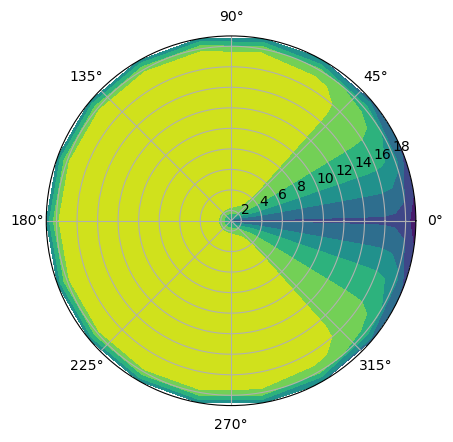

In [20]:
#-- Generate Data -----------------------------------------
# Using linspace so that the endpoint of 360 is included...
azimuths = linspace(0,2*pi,19)
zeniths = x

R, theta = meshgrid(zeniths, azimuths)
values = Tnew(H(x),T,x,t)[:,:,9]


#-- Plot... ------------------------------------------------
fig, ax = subplots(subplot_kw=dict(projection='polar'))
ax.contourf(theta, R, values)

show()

In [14]:
def H(x):
    mat = zeros( (x.size,)*4 )
    for i in range(x.size):
        for j in range(x.size):
            for k in range(x.size):
                for m in range(x.size):
                    value = (
                        0.1 * delta(i,k)*delta(j-1,m) +
                        
                        0.25 * delta(i-1,k)*delta(j,m) +
                        
                        0.3 * delta(i,k)*delta(j,m) +
                        
                        0.25 * delta(i+1,k)*delta(j,m) +
                        
                        0.1 * delta(i,k)*delta(j+1,m)
                        )
                    mat[i,j,k,m] = value
    return mat

def matsum(mat,x):
    add = 0
    for i in range(x.size):
        for j in range(x.size):
            add += mat[i,j]
    return add

def Tnew1(mat1,mat2,x):
    T = zeros( (x.size,x.size) )
    
    for i in range(x.size):
        for j in range(x.size):
            A = multiply(mat1[:,:,i,j],mat2)
            add = matsum(A,x)
            T[i,j] = add
    return T

def Tnew(mat1,mat2,x,t):
    T = zeros( (x.size,x.size,t.size) )
    T[:,:,0] = mat2
    
    for i in range(1,t.size):
        T[:,:,i] = Tnew1(mat1,T[:,:,i-1],x)
    return T

In [15]:
x = arange(1,5,1)
t = arange(1,11,1)

def T0(x):
    A = empty( (x.size,x.size) )
    for i in range(x.size):
        for j in range(x.size):
            A[i,j] = 20
    return A

T = T0(x)
H = H(x)

In [22]:
Tnew(H,T,x,t)[:,:,3]

array([[ 7.9875, 10.5475, 10.5475,  7.9875],
       [12.6625, 16.6475, 16.6475, 12.6625],
       [12.6625, 16.6475, 16.6475, 12.6625],
       [ 7.9875, 10.5475, 10.5475,  7.9875]])